

# Project: Investigate a Dataset - No Show appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset consist of medical appointments of Hospitals in Brazil. it was source from Kaggle by ALX Data Analyst Nanodegree team. The dataset mainly catalog people that scheduled appointment at various hospital locations, some people show up for their appointment while others didn't show up. The dataset consist of 110527 rows and 14 columns. My analysis is about understanding the trends of those that show up as compare to the total people that scheduled appointment.
The columns found in this dataset are:
1. Patient ID -------------- Holds the patient id number
2. Appointment ID----------- Hold the patient appointment id number
3. Gender ------------------ Tell if the patient is Male / Female
4. Scheduled Day ----------- Shows the date the appointment was scheduled
5. Appointment Day --------- Shows the day for the appointment
6. Age --------------------- Shows the age of the patient
7. Neighbourhood ----------- Show the location / neighbourhood of the hospital
8. Scholarship ------------- Shows if the patient on Brazilian welfare program or not
9. Hipertension ------------ Shows if the patient has hipertension or not
10. Diabetes --------------- Shows if the patient has diabetes or not
11. Alcoholism ------------- Shows if the patient is alcoholic or not
12. Handcap ---------------- Show if the patient is handicap or not
13. SMS Received ----------- Shows if the patient received SMS for for appointment or not
14. No show ---------------- Tells if the patient show up for appointment or not



### Question(s) for Analysis

1. What percentage of people that show up are Male or Female?
2. What is the percentage of various age group that are found in those that show up?
3. How often does those without scholarship show up?

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

I'm kicking off this project by loading the dataset, assessing the data by getting both general and statistical overview.
I'll also be checking for missing values, duplicates and check the number of unique values in each columns before moving on to data cleaning.

### General Properties


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Getting the number of rows and columns in the dataset
df.shape

(110527, 14)

In [5]:
# Getting a general overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
# Checking for missing values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# Checking for duplicates
sum(df.duplicated()) # No duplicates found

0

In [9]:
# Getting a statistical overview
df.describe() # sppoted an abnormal age of -1

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The dataset does not contain any missing value and duplicates. 

The naming of some columns needs to be corrected. 

There is an abnormal age -1 found the age column.


### Data Cleaning
After getting an overview of the data, some data cleaning  and Feature Engineering is needed. Such as :
 1. Renaming cloumns by using lower case and underscore to seperate words
 2. Changing the data type of Scheduled Day & Appointment day to datetime 
 5. Creating  two new columns for month from both scheduled day & appointment day, as all appointment are for 2016
 3. Changing the feature "no_show"  to "show_up" and switch the values around (NO for YES) and (YES for NO), because it is confusing.
 4. Create a new feature called AGE GROUP from the age column comtaining:
     CHILDREN 0-14 yrs
     YOUTH 15-30 yrs
     YOUNG ADULT 31-39 yrs
     ADULT 40-60 yrs
     ELDERLY 61+ yrs
 

In [10]:
# Renaming columns by using lowercase and underscore to seperate words
df = df.rename(columns = lambda x: x.strip().lower().replace('day','_day'))
df = df.rename(columns = lambda x: x.strip().lower().replace('id','_id'))

In [11]:
# Renaming 'no-show' to 'show_up'
df.rename(columns ={'no-show':'show_up'},inplace=True)

In [12]:
# Switching the values of show_up (No to Yes) and (Yes to No)
switch_val = {'No':'Yes', 'Yes':'No'}
df['show_up'] = df['show_up'].map(switch_val)

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [13]:
# Changing data type of scheduled_day and appointment_day to datetime
df['scheduled_day'] = df['scheduled_day'].astype('datetime64')
df['appointment_day'] = df['appointment_day'].astype('datetime64')

In [14]:
# Changing the abmormal age of -1 to 1
df[df['age']== -1] # Viewinf the row with the abnormal age

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,Yes


In [15]:
# Replacing the banormal age
df['age'] = df.age.replace(-1,1)
df[df['age']== -1] # Re-ckecking if the abnormal age have been replaced

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up


In [16]:
# Creating a new column called (age_group) which contain bins of ages
bin_edges = [-1,15,30,39,60,116]
labels = ['Children','Youth','Young Adult','Adult','Elderly']

df['age_group'] = pd.cut(df.age,bins=bin_edges,labels=labels)

In [17]:
# Re arranging the columns appropriately
data = df[['patient_id', 'appointment_id','scheduled_day','appointment_day','gender','age','age_group',
            'neighbourhood', 'scholarship','hipertension', 'diabetes', 'alcoholism','handcap', 
              'sms_received','show_up']]
data.head()

,patient_id,appointment_id,scheduled_day,appointment_day,gender,age,age_group,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_up
0,2.987250e+13,5642903,2016-04-29 18:38:08,2016-04-29,F,62,Elderly,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,2016-04-29 16:08:27,2016-04-29,M,56,Adult,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,2016-04-29 16:19:04,2016-04-29,F,62,Elderly,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,2016-04-29 17:29:31,2016-04-29,F,8,Children,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,2016-04-29 16:07:23,2016-04-29,F,56,Adult,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
gender             110527 non-null object
age                110527 non-null int64
age_group          110527 non-null category
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
show_up            110527 non-null object
dtypes: category(1), datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.9+ MB


At this point, all the above metion data cleaning process are achieved.


<a id='eda'></a>
## Exploratory Data Analysis

After cleaning the dataset and creating new features, finding trends and pattern is next by using statistics and charts for visualization.

1. Analyzing the gender in relation to those that show up
2. Analyzing the age group in relation to those that show up
3. Analyzing the scholarship in relation to those that show up


In [19]:
# Seperate dataset into those that show up and didn't show up

showed_up = data[data['show_up'] == 'Yes'] # Those show up dataset
no_show = data[data['show_up'] == 'No'] # Those didn't show up dataset

showUp_total = showed_up['show_up'].count() #total count of those show up

### Research Question 1:  What percentage of people that show up are Male or Female?

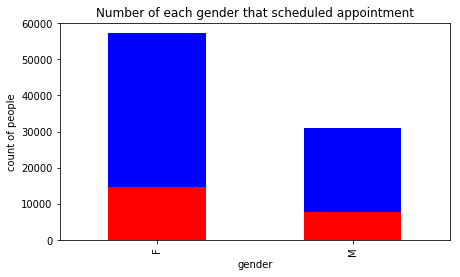

In [20]:
# ANALYZING THE GENDER
# Number of people that scheduled appointment per gender, including those show up and didn't show up

def column_count(col):
    showUp = showed_up.groupby(col)['show_up'].count()
    noShow = no_show.groupby(col)['show_up'].count()
    

    # Visualizing number of gender with appointment
    plt.figure(figsize=(7,4))
    showUp.plot(kind='bar', color='b', label='Yes') # those show up
    noShow.plot(kind = 'bar', color='r', label= "No") # those didn't show up
    plt.ylabel('count of people')
    plt.title(f'Number of each {col} that scheduled appointment')
    plt.show()
    
    
column_count('gender')

In relation to gender, there are almost 2x more Female than Male that scheduled appointment.

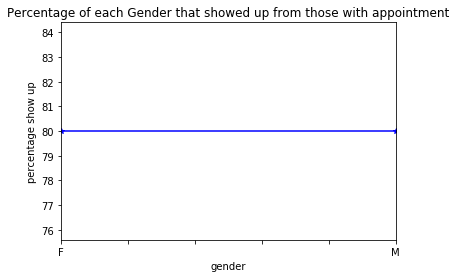

In [21]:
# percentage of Male & Female show up from those with appointment
gender_showUp = showed_up.groupby('gender')['show_up'].count()
gender_count = data.groupby('gender')['show_up'].count()
percent_showUp = round(gender_showUp / gender_count * 100) # get the % of gender show up from those with appointment 

plt.figure(figsize=(6,4))
percent_showUp.plot(kind='line', color='b', marker='*') # Seen below equal % of both Male & Female show up
plt.xlabel('gender')
plt.ylabel('percentage show up')
plt.title('Percentage of each Gender that showed up from those with appointment')
plt.show()

Equal percentage, 80% Female and 80% Male that scheduled appointment show up.

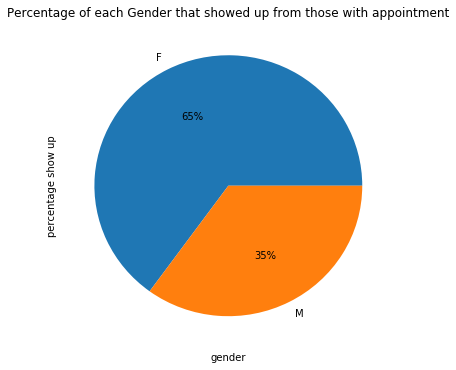

In [22]:
# Percentage of Male & Female found in those show up
gender_percent = round(gender_showUp / showUp_total * 100)

plt.figure(figsize=(6,6))
gender_percent.plot(kind='pie', autopct = '%1.0f%%')
plt.xlabel('gender')
plt.ylabel('percentage show up')
plt.title('Percentage of each Gender that showed up from those with appointment')
plt.show()

Of the total number of people that show up, 65% are Male and 35% are Female.

### Research Question 2 : What is the percentage of various age group that are found in those that show up?

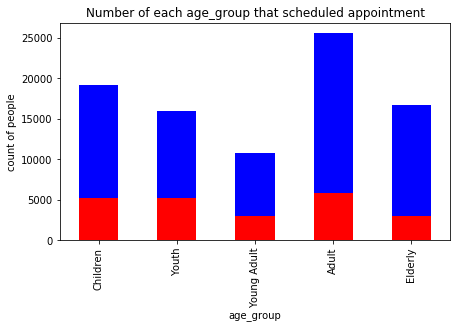

In [23]:
# ANALYZING THE AGE GROUP
# Number of people in age group that show up vs. didn't show up for their appointment
column_count('age_group') # Using the function above to get the count of each age_group

The population of ages that scheduled appointment are mostly Adult,followed by children,Elderly,Youth and Young Adult.

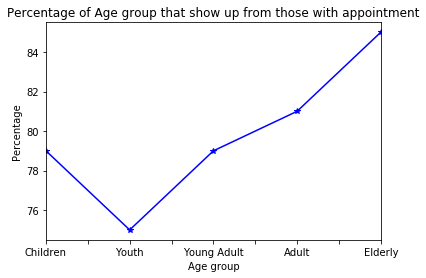

In [24]:
# Visualizing the percentage of those scheduled appointment that show up in each age group
age_showUp = showed_up.groupby('age_group')['show_up'].count()
ageGroup_count = data.groupby('age_group')['show_up'].count()
ageShow_percent = round(age_showUp / ageGroup_count * 100)

plt.figure(figsize=(6,4))
ageShow_percent.plot(kind='line', color='b',marker='*')
plt.xlabel('Age group')
plt.ylabel('Percentage')
plt.title('Percentage of Age group that show up from those with appointment')
plt.show()

75% above of each age group that scheduled appointment show up, which is a positive show up rate.
The percentage of each age group with appointment that show up are in order:

1. Elderly(61+ yrs) ------- 85%
2. Adult(40-60 yrs) ------- 81%
3. Children(0-15 yrs)------ 79%
4. Young Adult(31-39 yrs)-- 79%
5. Youth(16-30) ----------- 75%

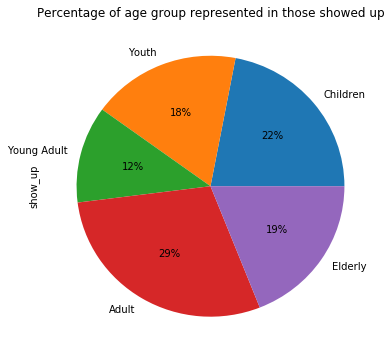

In [25]:
# Percentage of age group labels found in those that showed up
ageGroup_percent = round(age_showUp / showUp_total * 100)

plt.figure(figsize=(6,6))
ageGroup_percent.plot(kind='pie', autopct='%1.0f%%')
plt.title('Percentage of age group represented in those showed up')
plt.show()

Of those that show up, Adult dominates(29%) and young adult are least represented with 12%

### Research Question 3: How often does those without scholarship show up?

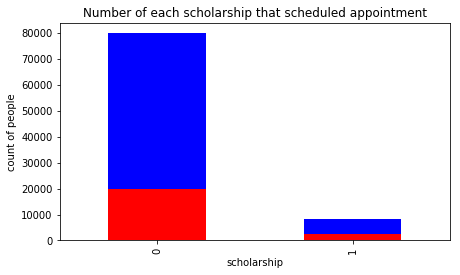

In [26]:
# ANALYZING THE SCHOLARSHIP SECTION
# Number of people with and without scholarship that scheduled appointment, separated by those show up and didn't show

column_count('scholarship') # Using the column count function above

From the analysis above, the ratio of people without scholarship to people with scholarship that schedule appointment is about 5:1. Which means a great majority of people that scheduled appointment are without scholarship.

Text(0.5,1,'Percentage with scholarship vs without that show up ')

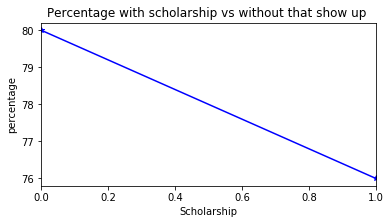

In [27]:
# percentage with scholarship and without scholarship that show up from those scheduled appointment
scholarship_showUp = showed_up.groupby('scholarship')['show_up'].count()
scholarship_total = data.groupby('scholarship')['show_up'].count()
scoShow_percent = round(scholarship_showUp / scholarship_total * 100)

plt.figure(figsize=(6,3))
scoShow_percent.plot(kind='line',color='b',marker='*')
plt.xlabel('Scholarship')
plt.ylabel('percentage')
plt.title('Percentage with scholarship vs without that show up ')

About 80% of people without scholarship show up for appointment, while 75% of people with scholarship show up for appointment after schedulling.

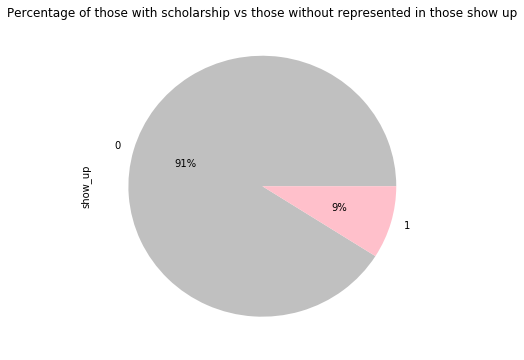

In [28]:
# Percentage of those with and without scholarship from those that show up
scholarship_percent = round(scholarship_showUp / showUp_total * 100)

colors = ['silver', 'pink']
plt.figure(figsize=(6,6))
scholarship_percent.plot(kind='pie', autopct = '%1.0f%%', colors=colors)
plt.title('Percentage of those with scholarship vs those without represented in those show up')
plt.show()

Of the total number of people that show up, 91% are without scholarship, while 9% are with scholarship.

<a id='conclusions'></a>
## Conclusions

1. Majority of those that show up for their appointment are Female(65%) compare to Male(35%), And its so because the ratio of female that scheduled appointment to male is about 2:1.

2. From those that show up, 29% are Adult, 22% are children, 19% are Elderly,18% are Youth and 12% are Young Adult.

3. A great majority of people that schedule appoinment are those without scholarship and  80% of them show up for their appointment.


Though I have put a lot of work into this project, The analysis is not tentatively done. There are a lot more insight and trends that can be pull out of this like:
a. Checking percentage of male that are alcoholic compare to females

b. Checking which neigbourhood received the most appointment

c. Checking if receiving SMS is key factor for people showing up for their appointment, etc.

#### Limitation
The hindrance I faced while working on this project, is to rotate the xticks of the bar charts. I tried to have the xticks sit horizontally, but I found it difficult and I ended up leaving it vertically.


## Submitting your Project 


In [29]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0